/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

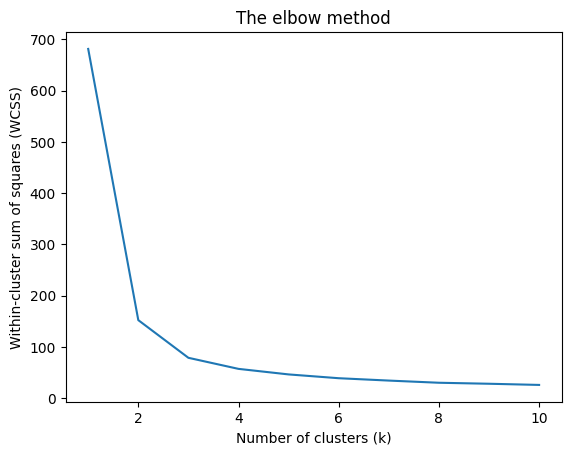

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Logistic Regression without PCA:
Accuracy: 0.9164285714285715, Time: 128.7768828868866 seconds
Logistic Regression with PCA:
Accuracy: 0.9216428571428571, Time: 58.377952337265015 seconds (PCA Time: 7.644144058227539 seconds)


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import time


# Load the iris dataset
iris = load_iris()

# Create a list of k values to try
k_values = range(1, 11)

# Calculate the within-cluster sum of squares (WCSS) for each k value
wcss = []
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(iris.data)
    wcss.append(kmeans.inertia_)

# Plot the WCSS vs k values
plt.plot(k_values, wcss)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Within-cluster sum of squares (WCSS)')
plt.title('The elbow method')
plt.show()

# Load MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
X_mnist, y_mnist = mnist.data / 255., mnist.target.astype(int)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_mnist, y_mnist, test_size=0.2, random_state=42)

# Apply StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA
pca = PCA(n_components=0.95)  # Retain 95% of variance
start_time = time.time()
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
pca_time = time.time() - start_time

# Logistic Regression without PCA
logisticRegr = LogisticRegression(solver='lbfgs', max_iter=1000)
start_time = time.time()
logisticRegr.fit(X_train_scaled, y_train)
logisticRegr_time_no_pca = time.time() - start_time
y_pred_no_pca = logisticRegr.predict(X_test_scaled)
accuracy_no_pca = accuracy_score(y_test, y_pred_no_pca)

# Logistic Regression with PCA
logisticRegr_pca = LogisticRegression(solver='lbfgs', max_iter=1000)
start_time = time.time()
logisticRegr_pca.fit(X_train_pca, y_train)
logisticRegr_time_pca = time.time() - start_time
y_pred_pca = logisticRegr_pca.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test, y_pred_pca)

print("Logistic Regression without PCA:")
print(f"Accuracy: {accuracy_no_pca}, Time: {logisticRegr_time_no_pca} seconds")
print("Logistic Regression with PCA:")
print(f"Accuracy: {accuracy_pca}, Time: {logisticRegr_time_pca} seconds (PCA Time: {pca_time} seconds)")


